## 1. Implement the kNN algorithm

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
# Loading data
path = 'D:\OneDrive - uni-bonn.de\Module 10 Introduction to Machine Learning Tutorial\Project-01'
def load_dataset():
    csv_path= os.path.join(path,'diabetes.csv')
    return pd.read_csv(csv_path)

In [3]:
# Data Exploration
dataset= load_dataset()
dataset.info()
dataset.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [4]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


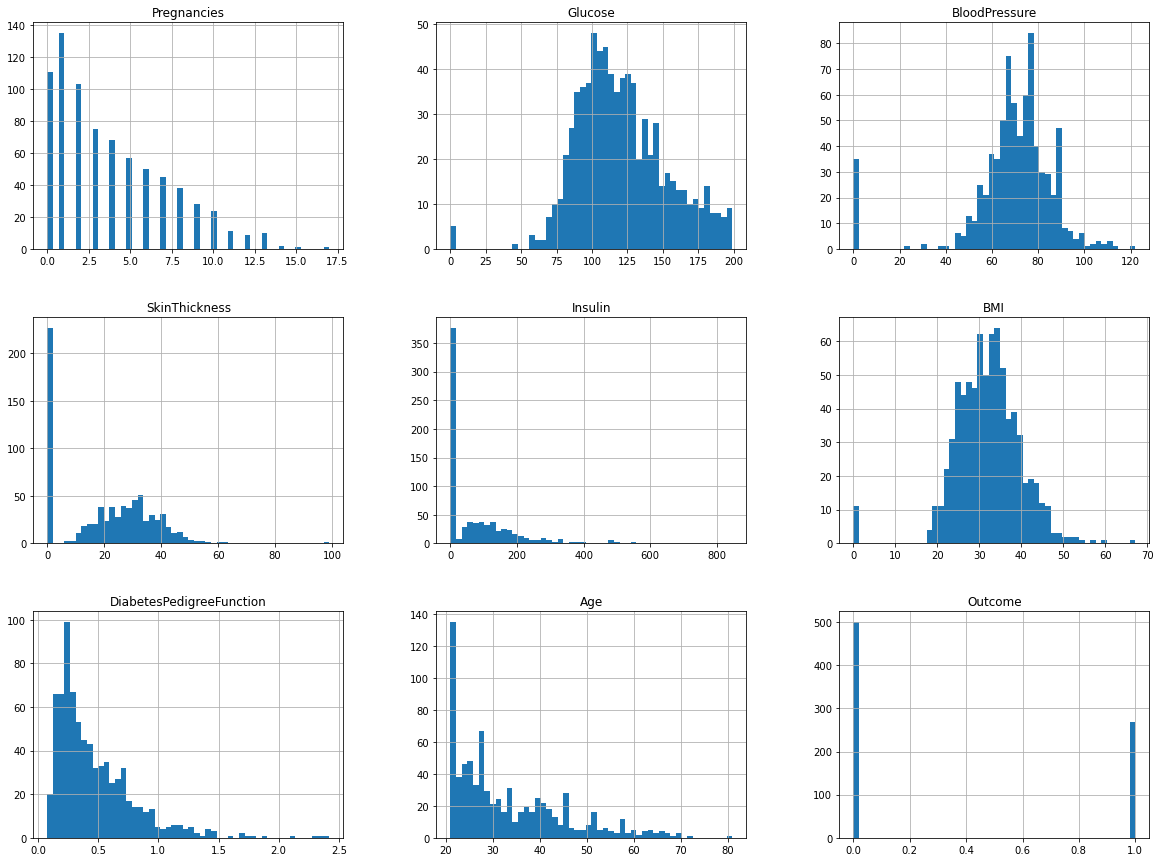

In [6]:
#Plotting data
dataset.hist(bins=50, figsize = (20,15))
plt.show()

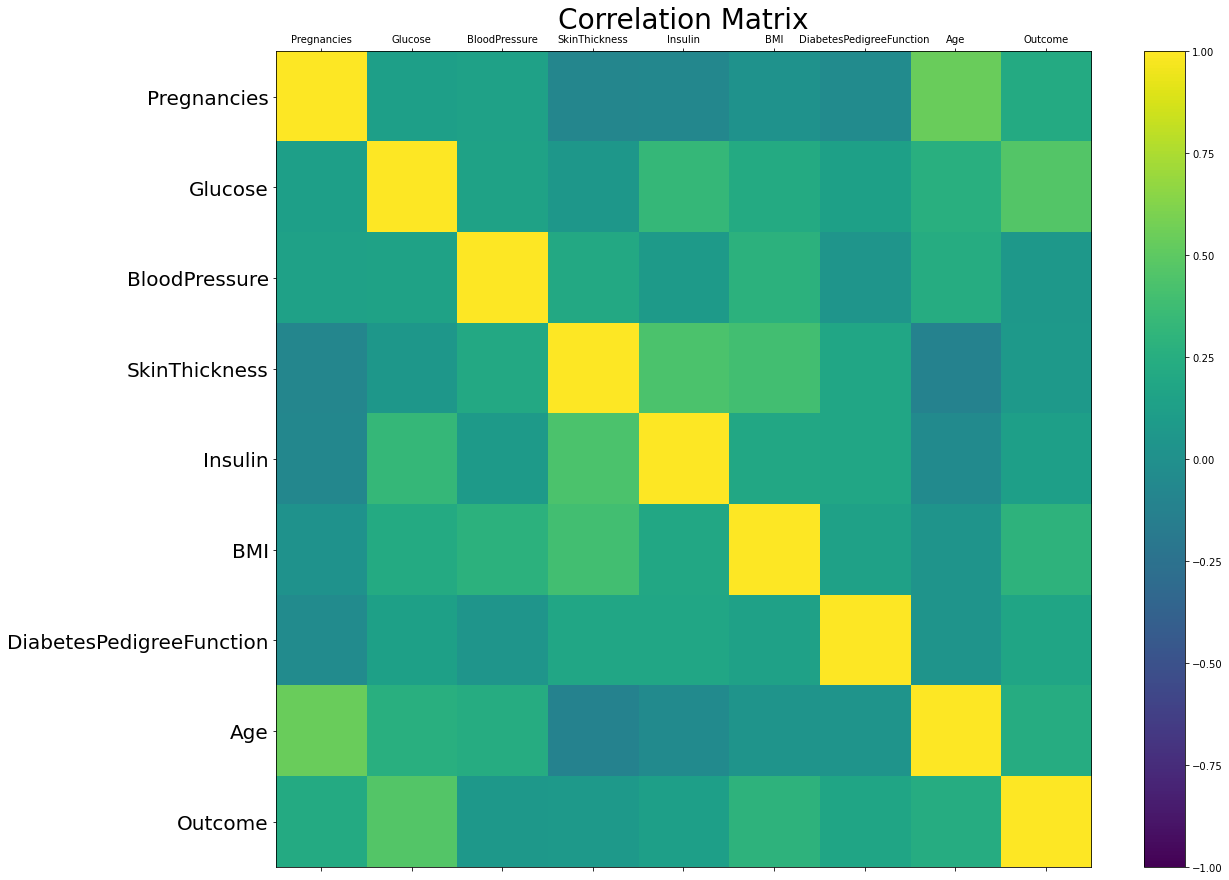

In [7]:
# Correlation matrix
#%matplotlib inline
fig = plt.figure(figsize=(19, 15))
corr = dataset.corr()

# Colours the rectangles by correlation value
#111 stands for 1x1 grid, first subplot
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)


# Plots x-ticks labels
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=10)
           
# Plots y-ticks labels
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=20)


plt.title('Correlation Matrix', fontsize=28)

#Plots the correlation matrix 
plt.show()
           

In [8]:
# Create features and labels 
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

# Create training and test set 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=123)

## 2. Implement Scaling

### 2a) Minmax Normalisation

#### Step 1: Implement scaling using minmax normalisation

In [9]:
from sklearn.preprocessing import MinMaxScaler 
minMaxScaler = MinMaxScaler()
features_train_norm = minMaxScaler.fit_transform(features_train) 
features_test_norm = minMaxScaler.transform(features_test)

In [10]:
dataset_features_train_norm = pd.DataFrame(features_train_norm, columns=dataset.columns.values[:-1])
dataset_features_train_norm.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.733668,0.000000,0.000000,0.000000,0.462963,0.069172,0.116667
1,0.176471,0.793970,0.622951,0.571429,0.329301,0.531987,0.330060,0.116667
2,0.294118,0.366834,0.491803,0.000000,0.000000,0.451178,0.081127,0.100000


In [11]:
dataset_features_test_norm = pd.DataFrame(features_test_norm, columns=dataset.columns.values[:-1])
dataset_features_test_norm.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.909548,0.688525,0.333333,0.258065,0.604377,0.216909,0.500000
1,0.117647,0.638191,0.475410,0.380952,0.369624,0.466330,0.649872,0.066667
2,0.647059,0.693467,0.622951,0.000000,0.000000,0.558923,0.146029,0.233333


#### Step2: Implement kNN algorithm after minmax normalisation

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier_norm = KNeighborsClassifier(n_neighbors=5)

# Fit data or train data
classifier_norm.fit(features_train_norm, labels_train)

# Predicting with classifier
pred_norm = classifier_norm.predict(features_test_norm)

#### Step3: Evaluate metrics after minmax normalisation

In [3]:
# Defining a function to evaluate metrics
def display_metrics(labels_test, pred):
    #Check accuracy
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(labels_test, pred)
    print('Accuracy: {:.2f}'.format(accuracy))
    
    #Check precision
    from sklearn.metrics import precision_score
    precision = precision_score(labels_test, pred)
    print ('Precision: {:.2f}'.format(precision))

    # Check recall
    from sklearn.metrics import recall_score
    recall = recall_score(labels_test, pred)
    print ('Recall: {:.2f}'.format(recall))

    # Check F1 score
    from sklearn.metrics import f1_score
    f1 = f1_score(labels_test, pred)
    print ('F1 score: {:.2f}'.format(f1))

    # Check with AUROC
    from sklearn.metrics import roc_auc_score
    auroc = roc_auc_score(labels_test, pred)
    print ('AUROC score: {:.2f}'.format(auroc))
    return accuracy, precision, recall, f1, auroc

# Defining a function to plot the AUROC-curve
def plot_roc_curve(labels_test, pred):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(labels_test, pred)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Accuracy: 0.73
Precision: 0.67
Recall: 0.58
F1 score: 0.62
AUROC score: 0.70


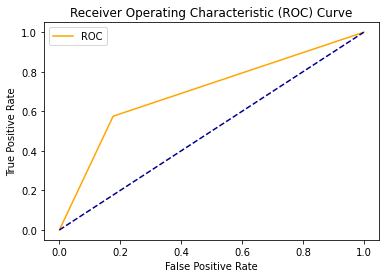

In [14]:
# Evaluation of algorithm
display_metrics(labels_test, pred_norm)
#AUROC curve
plot_roc_curve(labels_test, pred_norm)

### 2b) Standardisation

#### Step 1: Implement scaling using standardisation

In [15]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
features_train_std = standardScaler.fit_transform(features_train) 
features_test_std = standardScaler.transform(features_test)

In [16]:
dataset_features_train_std = pd.DataFrame(features_train_std, columns=dataset.columns.values[:-1])
dataset_features_train_std.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.535236,0.788665,-3.512833,-1.302729,-0.707457,-0.599473,-0.677063,-0.438376
1,-0.235045,1.166123,0.369268,0.979771,1.439284,-0.063197,1.193583,-0.438376
2,0.365336,-1.507539,-0.448017,-1.302729,-0.707457,-0.691032,-0.591338,-0.524058


In [17]:
dataset_features_test_std = pd.DataFrame(features_test_std, columns=dataset.columns.values[:-1])
dataset_features_test_std.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.965717,1.889584,0.777910,0.028729,0.974887,0.499239,0.382255,1.532308
1,-0.535236,0.191023,-0.550177,0.218938,1.702151,-0.573313,3.486732,-0.695422
2,2.166480,0.537026,0.369268,-1.302729,-0.707457,0.146082,-0.125973,0.161397


#### Step2: Implement kNN algorithm after standardisation

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier_std = KNeighborsClassifier(n_neighbors=5)

# Fit data or train data
classifier_std.fit(features_train_std, labels_train)

# Predicting with classifier
pred_std = classifier_std.predict(features_test_std)

#### Step3: Evaluate metrics after standardisation

Accuracy: 0.74
Precision: 0.70
Recall: 0.58
F1 score: 0.63
AUROC score: 0.71


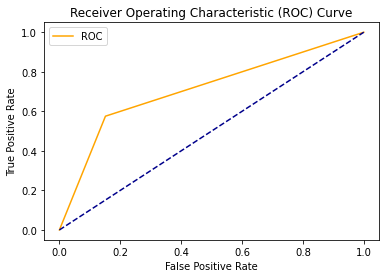

In [19]:
# Evaluation of algorithm
display_metrics(labels_test, pred_std)
#AUROC curve
plot_roc_curve(labels_test, pred_std)

Remark: scaling with standardisation strategy works well on this diabetes dataset.

## 3. Implement imputation

According to data plotting, we find some features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) have unexpected value 0. It means missing data at the data point. In the following steps, I will apply imputation to these features with two different strategies.

### 3a) Imputation using mean

#### Step 1: Implement imputation

In [20]:
# reload dataset
dataset = load_dataset()
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [21]:
# imputation with mean strategy
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values = 0, strategy = 'mean')
dataset.iloc[:,1:6] = pd.DataFrame(imputer_mean.fit_transform(dataset.values[:, 1:6]), # ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
                               columns=dataset.columns.values[1:6]) 

In [22]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1


#### Step 2: Implement kNN and evalutate metrics

Accuracy: 0.77
Precision: 0.69
Recall: 0.68
F1 score: 0.69
AUROC score: 0.75


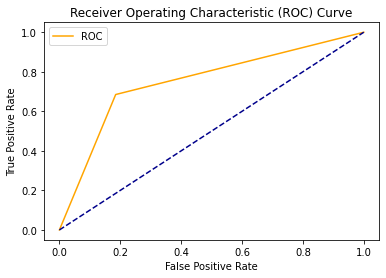

In [23]:
# Create features and labels 
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

# Create training and test set 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=123)

# Implement scaling using standardiation
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
features_train_std = standardScaler.fit_transform(features_train) 
features_test_std = standardScaler.transform(features_test)

# implement kNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_std = KNeighborsClassifier(n_neighbors=5)
# Fit data or train data
classifier_std.fit(features_train_std, labels_train)
# Predicting with classifier
pred_std = classifier_std.predict(features_test_std)

# Evaluation of algorithm
display_metrics(labels_test, pred_std)
#AUROC curve
plot_roc_curve(labels_test, pred_std)

Remark: The performance of algorithm is better than previous processing without imputation.

### 3b) Imputation using median

#### Step 1: Implement imputation

In [24]:
# reload dataset
dataset = load_dataset()
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [25]:
# imputation with median strategy
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values = 0, strategy = 'median')
dataset.iloc[:,1:6] = pd.DataFrame(imputer_median.fit_transform(dataset.values[:, 1:6]), # ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
                               columns=dataset.columns.values[1:6]) 

In [26]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1


#### Step 2: Implement kNN and evalutate metrics

Accuracy: 0.77
Precision: 0.71
Recall: 0.64
F1 score: 0.68
AUROC score: 0.74


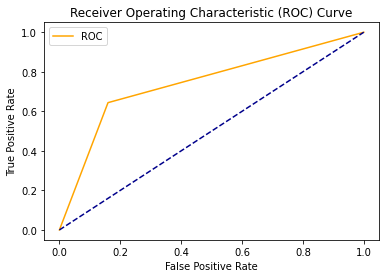

In [27]:
# Create features and labels 
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

# Create training and test set 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25,random_state=123)

# Implement scaling using standardiation
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
features_train_std = standardScaler.fit_transform(features_train) 
features_test_std = standardScaler.transform(features_test)

# implement kNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_std = KNeighborsClassifier(n_neighbors=5)
# Fit data or train data
classifier_std.fit(features_train_std, labels_train)
# Predicting with classifier
pred_std = classifier_std.predict(features_test_std)

# Evaluation of algorithm
display_metrics(labels_test, pred_std)
#AUROC curve
plot_roc_curve(labels_test, pred_std)

Remark: Imputation with median improves the performance of algorithm.

Compared with imputation using mean or median strategies, the latter one displays slightly better performance and improves our algorithm.

## 4. Once you have found your best set with points 1-3, you will test  different hyperparameters k (only odd numbers). Which k yields the best result, after data pre-processing: k = 3,5,7,9 ?

In [28]:
# Defining a function to pre-processing, implement kNN and test its performance
def knn(dataset, k=5):
    # imputation with median strategy
    from sklearn.impute import SimpleImputer
    imputer_median = SimpleImputer(missing_values = 0, strategy = 'median')
    dataset.iloc[:,1:6] = pd.DataFrame(imputer_median.fit_transform(dataset.values[:, 1:6]), # ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
                                   columns=dataset.columns.values[1:6])
    
    # Create features and labels 
    features = dataset.drop(['Outcome'], axis=1)
    labels = dataset['Outcome']

    # Create training and test set 
    from sklearn.model_selection import train_test_split
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=123)

    # Implement scaling using standardiation
    from sklearn.preprocessing import StandardScaler
    standardScaler = StandardScaler()
    features_train_std = standardScaler.fit_transform(features_train) 
    features_test_std = standardScaler.transform(features_test)

    # implement kNN algorithm
    from sklearn.neighbors import KNeighborsClassifier
    classifier_std = KNeighborsClassifier(n_neighbors=k)
    # Fit data or train data
    classifier_std.fit(features_train_std, labels_train)
    # Predicting with classifier
    pred_std = classifier_std.predict(features_test_std)

    # Evaluation of algorithm
    accuracy, precision, recall, f1, auroc = display_metrics(labels_test, pred_std)
    # AUROC curve
    plot_roc_curve(labels_test, pred_std)
    return accuracy, precision, recall, f1, auroc

k=3
Evaluation metrics:
Accuracy: 0.76
Precision: 0.69
Recall: 0.66
F1 score: 0.67
AUROC score: 0.74


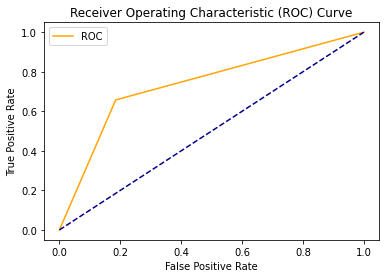

k=5
Evaluation metrics:
Accuracy: 0.77
Precision: 0.71
Recall: 0.64
F1 score: 0.68
AUROC score: 0.74


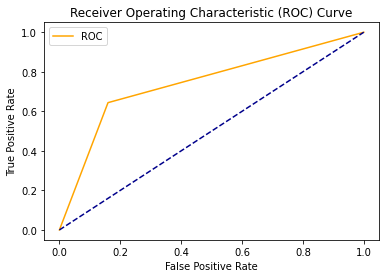

k=7
Evaluation metrics:
Accuracy: 0.79
Precision: 0.75
Recall: 0.68
F1 score: 0.71
AUROC score: 0.77


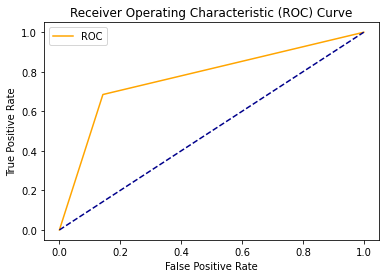

k=9
Evaluation metrics:
Accuracy: 0.79
Precision: 0.75
Recall: 0.67
F1 score: 0.71
AUROC score: 0.77


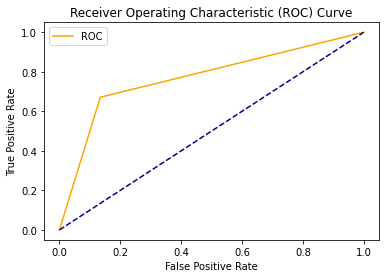

In [29]:
# reload dataset
dataset = load_dataset()
metric_dict = {}
for k in range(3,10,2):
    print(f"k={k}\nEvaluation metrics:")
    accuracy, precision, recall, f1, auroc = knn(dataset, k=k)
    metric_dict[k] = [accuracy, f1, auroc]

Remark: hyperparameters k=7, k=9 yields the best result.

## 5. Present your evaluation in graphs

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid') 

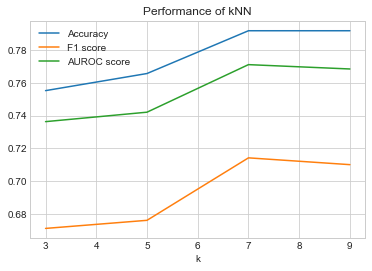

In [31]:
k = [3,5,7,9]
accuracy = [metric_dict[i][0] for i in k]
f1 = [metric_dict[i][1] for i in k]
auroc = [metric_dict[i][2] for i in k]

plt.plot(k, accuracy, label="Accuracy")
plt.plot(k, f1, label="F1 score")
plt.plot(k, auroc, label="AUROC score")
plt.title("Performance of kNN")
plt.xlabel("k")
plt.legend()
plt.show()

## 6. Discussion about imbalanced data

### 6a) Data up-sampling

#### Step 1: Imputation

In [4]:
# reload dataset
dataset = load_dataset()

# imputation with median strategy
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values = 0, strategy = 'median')
dataset.iloc[:,1:6] = pd.DataFrame(imputer_median.fit_transform(dataset.values[:, 1:6]), # ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
                               columns=dataset.columns.values[1:6])

# Create features and labels 
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

# Create training and test set 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=123)

#### Step 2: Testing balance of data

In [5]:
labels_train.value_counts()

0    381
1    195
Name: Outcome, dtype: int64

In [6]:
labels_test.value_counts()

0    119
1     73
Name: Outcome, dtype: int64

#### Step 3: Up-sampling

In [7]:
# Data up-sampling
from sklearn.utils import resample

df = pd.concat([features_train,labels_train],axis=1)
df.rename(columns={'Outcome':'balance'}, inplace=True)

# Separate majority (n=381) and minority (n=195) classes
df_majority = df[df['balance']==0] 
df_minority = df[df['balance']==1]

# Upsample samples with replacement for minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True, # sample with replacement
                                 n_samples=381, # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.balance.value_counts()

1    381
0    381
Name: balance, dtype: int64

In [8]:
# re-preparing the training sets
features_train = df_upsampled.drop(['balance'], axis=1)
labels_train = df_upsampled[['balance']]
labels_train.rename(columns={'balance':'Outcome'}, inplace=True)

#### Step 4: Scaling

In [9]:
# Implement scaling using standardiation
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
features_train_std = standardScaler.fit_transform(features_train)
features_test_std = standardScaler.transform(features_test)

#### Step 5: Implement kNN algorithm and evaluation

Accuracy: 0.76
Precision: 0.63
Recall: 0.88
F1 score: 0.74
AUROC score: 0.78


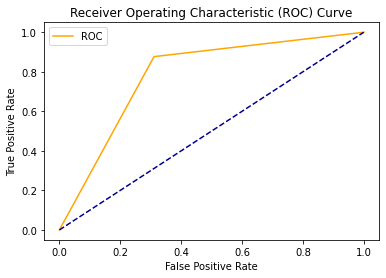

In [10]:
# implement kNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
# Fit data or train data
classifier.fit(features_train_std, labels_train)
# Predicting with classifier
pred = classifier.predict(features_test_std)

# Evaluation of algorithm
accuracy, precision, recall, f1, auroc = display_metrics(labels_test, pred)
# AUROC curve
plot_roc_curve(labels_test, pred)

### 6b) Data down-sampling

#### Step 1: imputation, split dataset, scaling data

In [11]:
# reload dataset
dataset = load_dataset()

# imputation with median strategy
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values = 0, strategy = 'median')
dataset.iloc[:,1:6] = pd.DataFrame(imputer_median.fit_transform(dataset.values[:, 1:6]), # ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
                               columns=dataset.columns.values[1:6])

# Create features and labels 
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

# Create training and test set 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=123)

#### Step 2: Testing balance of data

In [12]:
labels_train.value_counts()

0    381
1    195
Name: Outcome, dtype: int64

In [13]:
labels_test.value_counts()

0    119
1     73
Name: Outcome, dtype: int64

#### Step 3: Down-sampling

In [14]:
# Data up-sampling
from sklearn.utils import resample

df = pd.concat([features_train,labels_train],axis=1)
df.rename(columns={'Outcome':'balance'}, inplace=True)

# Separate majority (n=367) and minority (n=209) classes
df_majority = df[df['balance']==0] 
df_minority = df[df['balance']==1]

# Upsample samples without replacement for minority class
df_majority_downsampled = resample(df_majority,
                                   replace=False, # sample without replacement
                                   n_samples=195, # to match minority class
                                   random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.balance.value_counts()

1    195
0    195
Name: balance, dtype: int64

In [15]:
# re-preparing the training sets
features_train = df_downsampled.drop(['balance'], axis=1)
labels_train = df_downsampled[['balance']]
labels_train.rename(columns={'balance':'Outcome'}, inplace=True)

#### Step 4: Scaling

In [16]:
# Implement scaling using standardiation
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
features_train_std = standardScaler.fit_transform(features_train) # delete balance column
features_test_std = standardScaler.transform(features_test)

#### Step 5: Implement kNN algorithm and evaluation

Accuracy: 0.76
Precision: 0.64
Recall: 0.86
F1 score: 0.73
AUROC score: 0.78


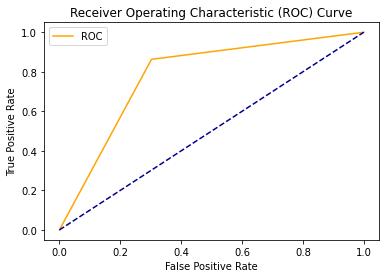

In [17]:
# implement kNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
# Fit data or train data
classifier.fit(features_train_std, labels_train)
# Predicting with classifier
pred = classifier.predict(features_test_std)

# Evaluation of algorithm
accuracy, precision, recall, f1, auroc = display_metrics(labels_test, pred)
# AUROC curve
plot_roc_curve(labels_test, pred)

k=7, standardisation

**None of both**
Accuracy: 0.79
Precision: 0.75
Recall: 0.68
F1 score: 0.71
AUROC score: 0.77

**Up-sampling**
Accuracy: 0.76
Precision: 0.63
Recall: 0.88
F1 score: 0.74
AUROC score: 0.78

**Down-sampling**
Accuracy: 0.76
Precision: 0.64
Recall: 0.86
F1 score: 0.73
AUROC score: 0.78

Remark: Up/Down-sampling is slightly better than the original strategies.